## Day-28:-

### PCA:-
```
Unsupervised Techniqe
We can extract the most important features and we can not totaly ognore other feature . we can gain some information from other features.  
First PC :- Highest variance
Second PC :-less than First PC varriance
Third PC :- less than third PC variance

### Data Encoding:-
```
Convert our Categorical data into Numerical data.
```
#### Types:-
```
1.Nominal or One Hot Encoding (OHE)
2.Ordinal or Label Encoding
3.Target guided Ordinal Encoding

### Nominal Encoding or  One Hot Encoding:-
```
No specific order or Rank
Nominal Encoding is a technique used to transform categorical variable that have no intrisic ordering into numerical value that can be used in machine learning models.One common method for nominal encoding is one-hot-Encoding. Which create a binart vector for each category in the variable.
```

### DisAdvantage:-
```
1.Sparse Matrics.:- Leading to overfitting.
2.If you have many no of diffrent value then don't use OHE . It create many no of features.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [48]:
data={"color":["Blue","Green","Green","Red","Blue"]}
df=pd.DataFrame(data)
df

,color
0,Blue
1,Green
2,Green
3,Red
4,Blue


In [49]:
encoder=OneHotEncoder()

In [50]:
encoded=encoder.fit_transform(df[["color"]]).toarray()

In [51]:
df1=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
df1

,color_Blue,color_Green,color_Red
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [52]:
df1=pd.concat([df,df1],axis=1)
df1

,color,color_Blue,color_Green,color_Red
0,Blue,1.0,0.0,0.0
1,Green,0.0,1.0,0.0
2,Green,0.0,1.0,0.0
3,Red,0.0,0.0,1.0
4,Blue,1.0,0.0,0.0


### label or Ordinal Encoder:-
```
Order matter

In [53]:
df

,color
0,Blue
1,Green
2,Green
3,Red
4,Blue


```
Create an rank of color

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [55]:
encoder.fit_transform(df["color"])

array([0, 1, 1, 2, 0])

In [56]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories =[["small","medium","large"]])

In [57]:
data=pd.DataFrame({
    "size":["small","medium","large","medium","small","large"]
})

In [58]:
data

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [59]:
encoder.fit_transform(data[["size"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

### Target Guided Ordinal Encoding
```
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [64]:
data=pd.DataFrame({
    "city":["New York","London","Paris","Tokyo","New York","Paris"],
    "price":[200,150,300,250,180,320]
})

In [65]:
data

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


```
Calculate the mean prices for each city.

In [68]:
mean_price=data.groupby("city")["price"].mean().to_dict()

```
replace each city with it's mean price.

In [70]:
data["city_encoded"]=data["city"].map(mean_price)
data

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


### Covarriance and Correlation:-
```
Finding the Relationship b/w features

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns


In [73]:
df=sns.load_dataset("tips")

In [74]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

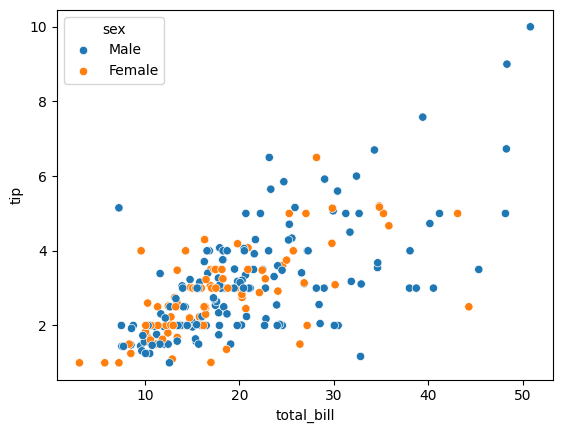

In [77]:
sns.scatterplot(x="total_bill",y="tip",data=df,hue="sex")

In [82]:
df[["total_bill","tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000
